In [48]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv("data/cleaned_encoded_kickstarter_projects.csv")
df.head()

,category,subcategory,country,launched,deadline,goal,pledged,backers,state,duration,launch_month,category_encoded,subcategory_encoded,country_encoded
0,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39,4,5,52,21
1,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87,4,6,129,21
2,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,8,4,0,70,21
3,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,79,4,13,131,21
4,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,28,4,5,52,21


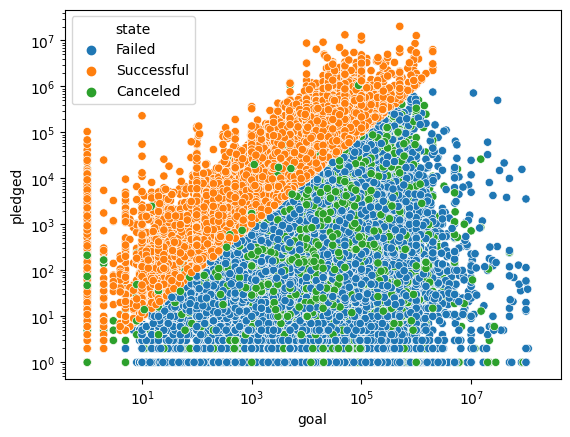

In [50]:
#droping the 'Live' or infinished observations in dataset
df = df.query("state != 'Live' and state != 'Suspended'")

ax = sns.scatterplot(data=df, x='goal',y='pledged', hue='state')
plt.xscale('log')
plt.yscale('log')

In [51]:
# Apply logarithmic transformation to 'goal' and 'pledged' columns
df['goal'] = np.log1p(df['goal'])  # log1p is used to handle zero values
df['pledged'] = np.log1p(df['pledged'])

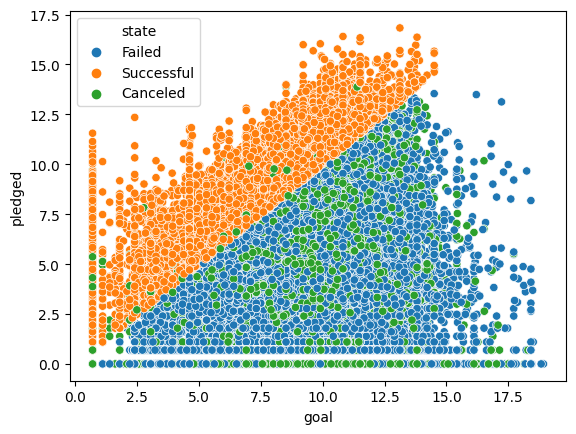

In [54]:
#check if transformation has been successful
ax = sns.scatterplot(x=df['goal'],y=df['pledged'], hue=df['state'])

In [56]:
df.describe().round(0)

,goal,pledged,backers,duration,launch_month,category_encoded,subcategory_encoded,country_encoded
count,370209.0,370209.0,370209.0,370209.0,370209.0,370209.0,370209.0,370209.0
mean,9.0,6.0,107.0,33.0,6.0,7.0,81.0,19.0
std,2.0,3.0,915.0,13.0,3.0,4.0,45.0,5.0
min,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,8.0,3.0,2.0,29.0,4.0,5.0,39.0,21.0
50%,9.0,6.0,12.0,29.0,6.0,7.0,87.0,21.0
75%,10.0,8.0,57.0,36.0,9.0,10.0,121.0,21.0
max,19.0,17.0,219382.0,91.0,12.0,14.0,158.0,21.0


In [57]:
#defining target and other variables
X = df[['duration','launch_month','category_encoded','country_encoded','goal']]
y = df[['pledged']]

In [58]:
#check for X
X.describe().round(0)

,duration,launch_month,category_encoded,country_encoded,goal
count,370209.0,370209.0,370209.0,370209.0,370209.0
mean,33.0,6.0,7.0,19.0,9.0
std,13.0,3.0,4.0,5.0,2.0
min,0.0,1.0,0.0,0.0,1.0
25%,29.0,4.0,5.0,21.0,8.0
50%,29.0,6.0,7.0,21.0,9.0
75%,36.0,9.0,10.0,21.0,10.0
max,91.0,12.0,14.0,21.0,19.0


In [59]:
#Check for y
y.describe()

,pledged
count,370209.000000
mean,5.771424
std,3.310949
min,0.000000
25%,3.496508
50%,6.452049
75%,8.313117
max,16.828050
